In [1]:
import filer as fi
import os
import numpy as np

datasets_path, id = fi.init_folder()

#find_matching_file(datasets_path, files, pre_extension='x') # choose img cutted
id_xpaths = fi.find_matching_file(datasets_path, id, pre_extension='x')
id_tpaths = fi.find_matching_file(datasets_path, id, pre_extension='')

# the full paths
id_xFpaths = list(map(lambda file: os.path.join(datasets_path, file) , id_xpaths))
id_tFpaths = list(map(lambda file: os.path.join(datasets_path, file) , id_tpaths))

# (lines, words, chars)
sample_data = np.array(list(map(lambda file: fi.count_text_stats(file), id_tFpaths)))

# Graficos de Frecuencia
- Lineas, Palabras, Caracteres

In [2]:
import matplotlib.pyplot as plt

def calculate_bins(data):
    """Bins calculation by different methods, provides sturges, sqrt, rice, fd rules"""
    n = len(data)
    bins_sturges = int(np.ceil(np.log2(n) + 1))
    bins_sqrt = int(np.ceil(np.sqrt(n)))
    bins_rice = int(np.ceil(2 * (n ** (1/3))))
    
    # Freedman-Diaconis Rule
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width_fd = 2 * iqr / (n ** (1/3))
    bins_fd = int(np.ceil((np.max(data) - np.min(data)) / bin_width_fd))
    names = ["Sturges Rule","Sqrt Rule","Rice Rule", "Freedman-Diaconis Rule"]
    bins = [bins_sturges, bins_sqrt, bins_rice, bins_fd]
    return names, bins

num_lines = sample_data[:,0]
num_words = sample_data[:,1]
num_chars = sample_data[:,2]

# Calculate bins for each dataset
_, bins_lines = calculate_bins(num_lines)
_, bins_words = calculate_bins(num_words)
bins_names, bins_chars = calculate_bins(num_chars)

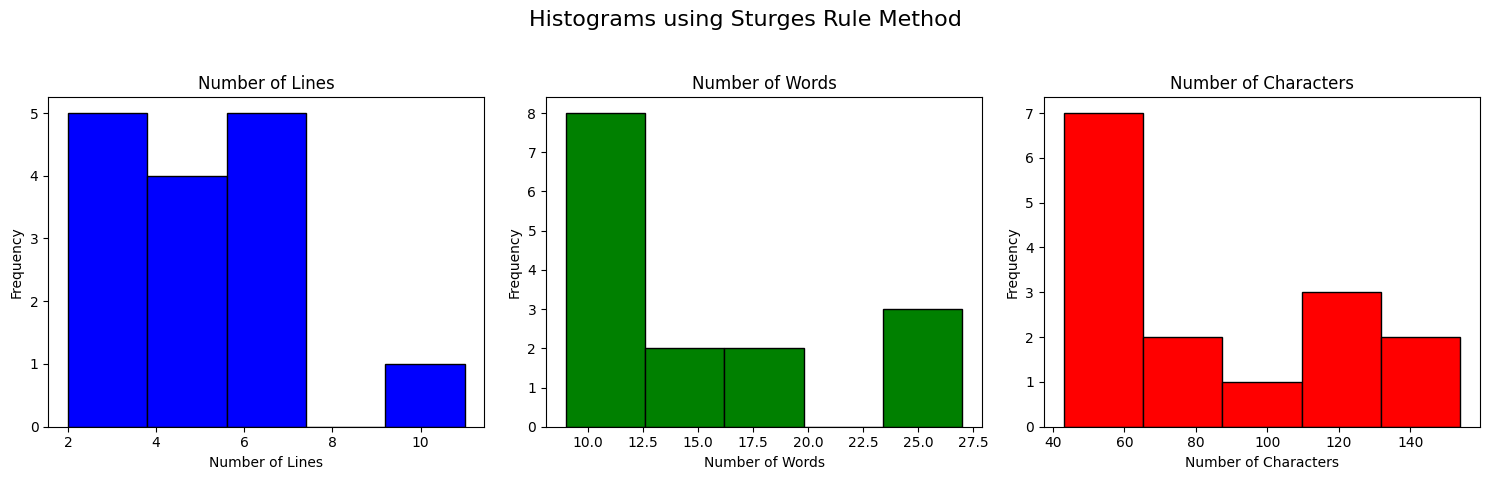

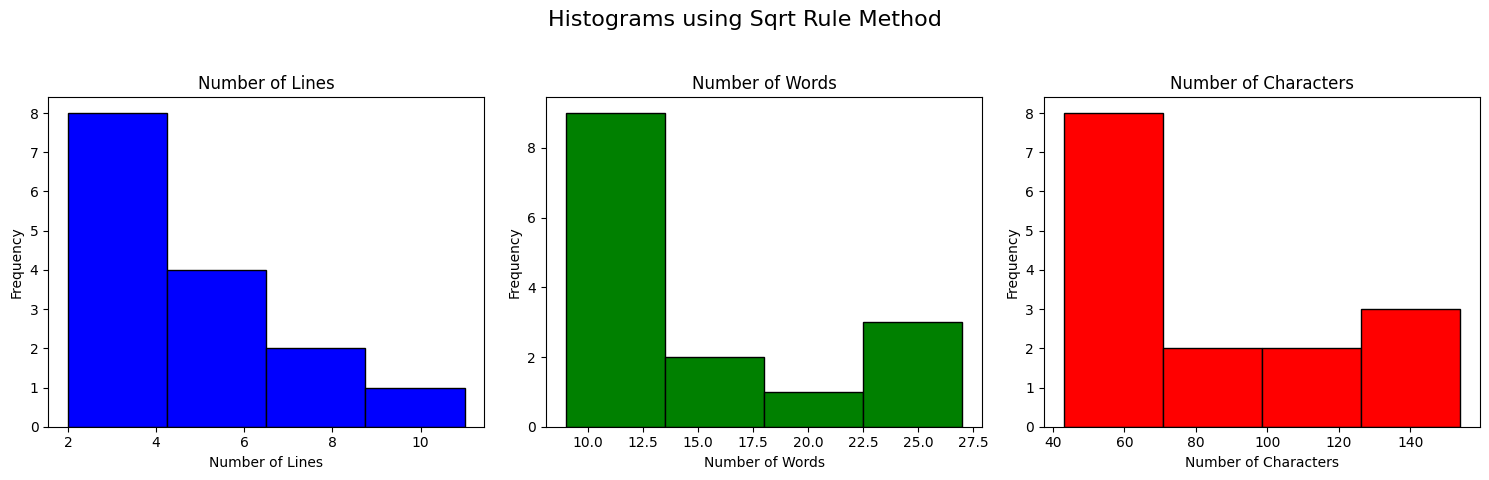

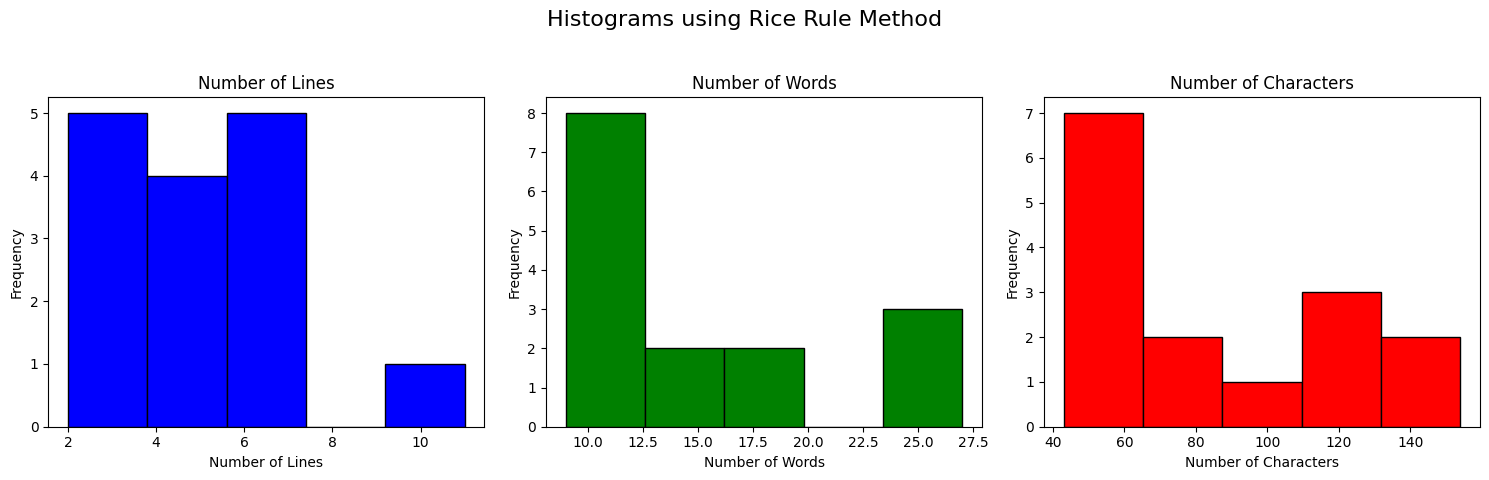

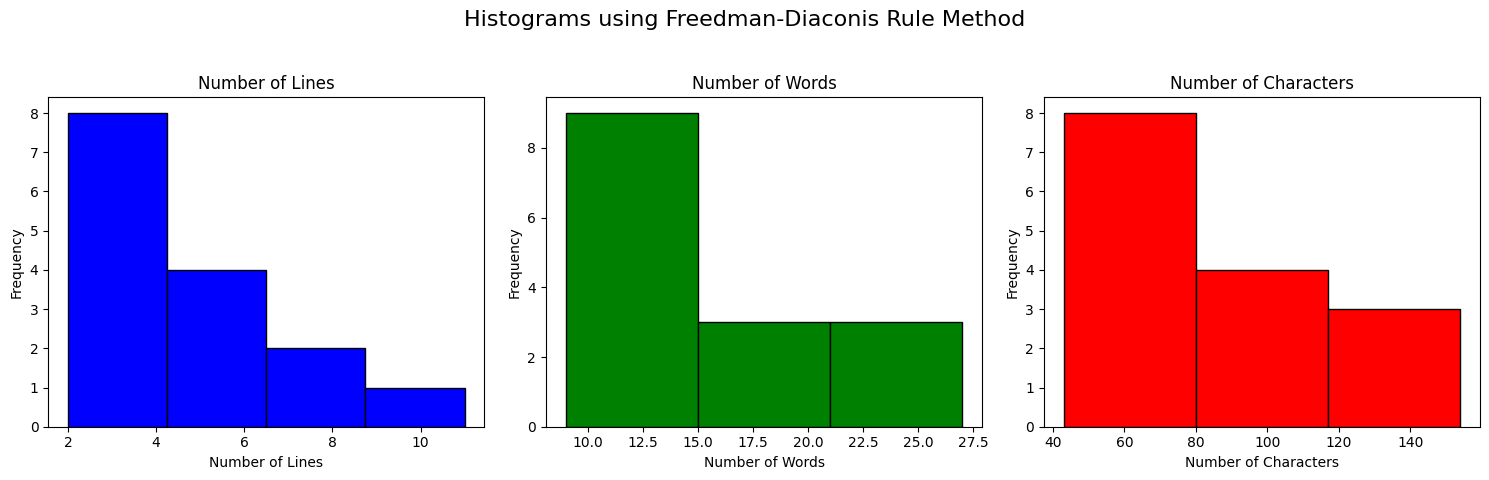

In [3]:
for IDX in range(len(bins_names)):
    bin_title = bins_names[IDX]
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f'Histograms using {bin_title} Method', fontsize=16)

    # Histogram for number of lines
    ax[0].hist(num_lines, bins=bins_lines[IDX], color='blue', edgecolor='black')
    ax[0].set_title('Number of Lines')
    ax[0].set_xlabel('Number of Lines')
    ax[0].set_ylabel('Frequency')

    # Histogram for number of words
    ax[1].hist(num_words, bins=bins_words[IDX], color='green', edgecolor='black')
    ax[1].set_title('Number of Words')
    ax[1].set_xlabel('Number of Words')
    ax[1].set_ylabel('Frequency')

    # Histogram for number of characters
    
    ax[2].hist(num_chars, bins=bins_chars[IDX], color='red', edgecolor='black')
    ax[2].set_title('Number of Characters')
    ax[2].set_xlabel('Number of Characters')
    ax[2].set_ylabel('Frequency')

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to accommodate the title

    # Show the histograms
    plt.show()